In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [99]:
data = pd.read_csv('bank-full.csv',delimiter=';')


In [100]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [101]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [102]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [103]:
#Checking for Null Values

data[data.isna()].sum()

age          0.0
job            0
marital        0
education      0
default        0
balance      0.0
housing        0
loan           0
contact        0
day          0.0
month          0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome       0
y              0
dtype: object

In [104]:
# Lets check for different job categories present

data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [105]:
# Lets check the avg amount of income for each category

Balance_avg=data.groupby('job')['balance'].mean()
Balance_avg

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

In [106]:
# Checking for the average age group with their balance who agreed for the Loan

Outcome_classification = data.groupby(['y','job'])['balance'].mean()
Outcome_classification

y    job          
no   admin.           1093.942070
     blue-collar      1063.402371
     entrepreneur     1494.642229
     housemaid        1353.740053
     management       1703.472723
     retired          1775.685927
     self-employed    1553.418103
     services          985.851783
     student          1347.578475
     technician       1179.842830
     unemployed       1556.144414
     unknown          1710.712598
yes  admin.           1437.283677
     blue-collar      1275.420904
     entrepreneur     1818.975610
     housemaid        1793.486239
     management       2140.707917
     retired          2690.627907
     self-employed    2351.807487
     services         1112.344173
     student          1488.739777
     technician       1838.152381
     unemployed       1334.257426
     unknown          2232.882353
Name: balance, dtype: float64

In [107]:
# Average waittime for a successful outcome(client subscribed a term deposit)
Avg_Time = data.groupby('y')['duration'].mean()
Avg_Time

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

In [108]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [109]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
cols = ['marital','education','default','housing','loan','contact','poutcome']
for i in cols:
    data[i] = label.fit_transform(data[i])





In [110]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,no
1,44,technician,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,no
2,33,entrepreneur,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,no
3,47,blue-collar,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,no
4,33,unknown,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,yes
45207,71,retired,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,yes
45208,72,retired,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,yes
45209,57,blue-collar,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,no


In [111]:
#Fuction Definations:

#Histogram Function:

def plot_hist(data , x_var , title , xlabel , ylabel , bins = 5, color = 'lightblue' , edgecolor = 'black' ,alpha = 0.8):
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_facecolor('lightgrey')

    """
    Creates a Histogram for the given Data 

    Parameters:
    - data (dataset) : Dataframe we need to study containing the columns 
    - x_var (list or a array) : The data to plot.
    - title (str, optional) : The title of the plot.
    - xlabel (str, optional) : The label for x-axis.
    - ylabel (str, optional) : The label for y-axis.
    - bins (int ,optional) : The number of bins to divide the data into (Default is 5).
    - color (str, optional) : THe color of the bars (Default is lightblue).
    - edgecolour (str, optional) : The color of the bar edges (Default is black).
    - alpha (float,optional)The transparency of the bars, from 0 (transparent) to 1 (opaque) (default is 0.8).

    Returns:
    - None: The function will display a Histogram
    """

    n, bins, patches = ax.hist(x_var , bins = bins , color = color , edgecolor = edgecolor , alpha = alpha)
    ax.set_title(title , fontsize = 16 , fontweight = 'bold')
    ax.set_xlabel(xlabel , fontsize = 16)
    ax.set_ylabel(ylabel , fontsize = 16)
    ax.grid(which='major' , axis = 'both')

    plt.plot()


#Bar Chart Function:
def plot_barplot(data , column_name , title , xlabel , ylabel ):
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_facecolor('#f0f0f0')
    """
    Creates a Bar Chart for the given Data 

    Parameters:
    - data (dataset) : Dataframe we need to study containing the columns 
    - column_name (list or a array) : The data to plot.
    - title (str, optional) : The title of the plot.
    - xlabel (str, optional) : The label for x-axis.
    - ylabel (str, optional) : The label for y-axis.

    Returns:
    - None: The function will display a Bar Chart
    """
    counts = data[column_name].value_counts()
    counts.plot(
        kind = 'bar',
        color = plt.cm.Set3(np.arange(len(counts))),
        ax = ax
    )
    ax.tick_params(axis='x' , labelsize = 20) 
    ax.tick_params(axis='y' , labelsize = 20) 
    ax.set_title(title , fontsize = 25 , fontweight = 'bold')
    ax.set_xlabel(xlabel , fontsize=23)
    ax.set_ylabel(ylabel , fontsize=23)
    plt.plot()

#Scatter Plot : 
def plot_scatterplot(xaxis , yaxis , xlabel , ylabel , hue , palette , alpha , legend_title , location_of_title , title , fontsize = 14):
    """
    Creates a Scatter Plot for the given Data 

    Parameters:
    - xaxis (str) : The Column name to plot on x axis 
    - yaxis (str) : The column name to plot on y axis .
    - title (str, optional) : The title of the plot.
    - hue (str or list) : Grouping variable that will produce points with different colors. Default is None
    - xlabel (str, optional) : The label for x-axis.
    - ylabel (str, optional) : The label for y-axis.
    - palette (str or list): Colors to use for different levels of the hue. 
    - alpha (float): Transparency of the points, between 0(fully transparent) and 1(fully opaque).
    - legend_title (str): Title for the legend.
    - location_of_title (str): Position of the title. Can be 'center', 'left', or 'right'.
    - fontsize (int, optional) : Fontsize of the legend (Default is 14)

    Returns:
    - None: The function will display a Box Plot
    """
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_facecolor('lightgrey')
    sns.scatterplot(data = data , x = xaxis , y = yaxis , hue = hue , palette = palette , alpha=alpha)
    legend = ax.legend(title = legend_title , loc = location_of_title , fontsize = fontsize)
    legend.get_title().set_fontsize(14)
    ax.set_title(title , fontsize = 25 , fontweight ='bold')
    ax.tick_params(axis = 'x' , labelsize = 18) 
    ax.tick_params(axis = 'y' , labelsize = 18) 
    ax.set_xlabel(xlabel , fontsize=22)
    ax.set_ylabel(ylabel , fontsize=22)
    
    plt.show()


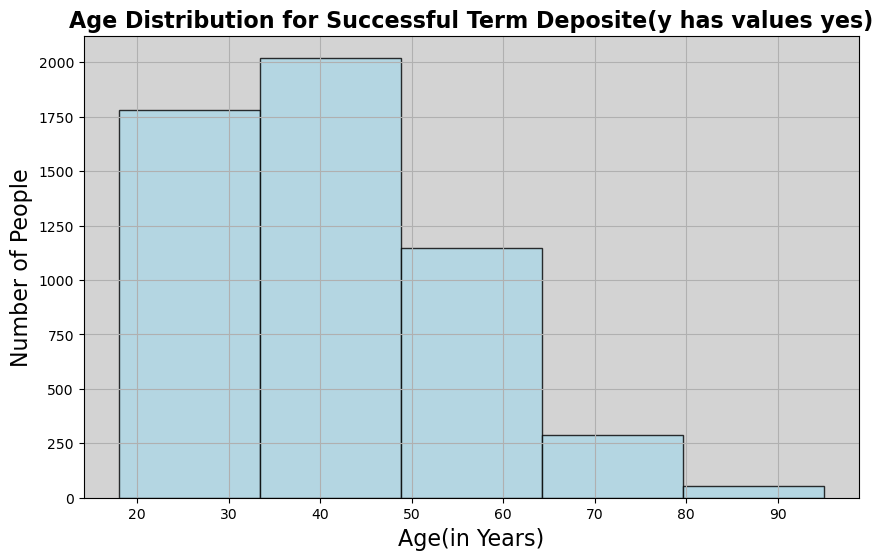

In [112]:


plot_hist(data , data[data['y']=='yes']['age'], 'Age Distribution for Successful Term Deposite(y has values yes)' , 'Age(in Years)' , 'Number of People' , bins = 5, color = 'lightblue' , edgecolor = 'black' ,alpha = 0.8)

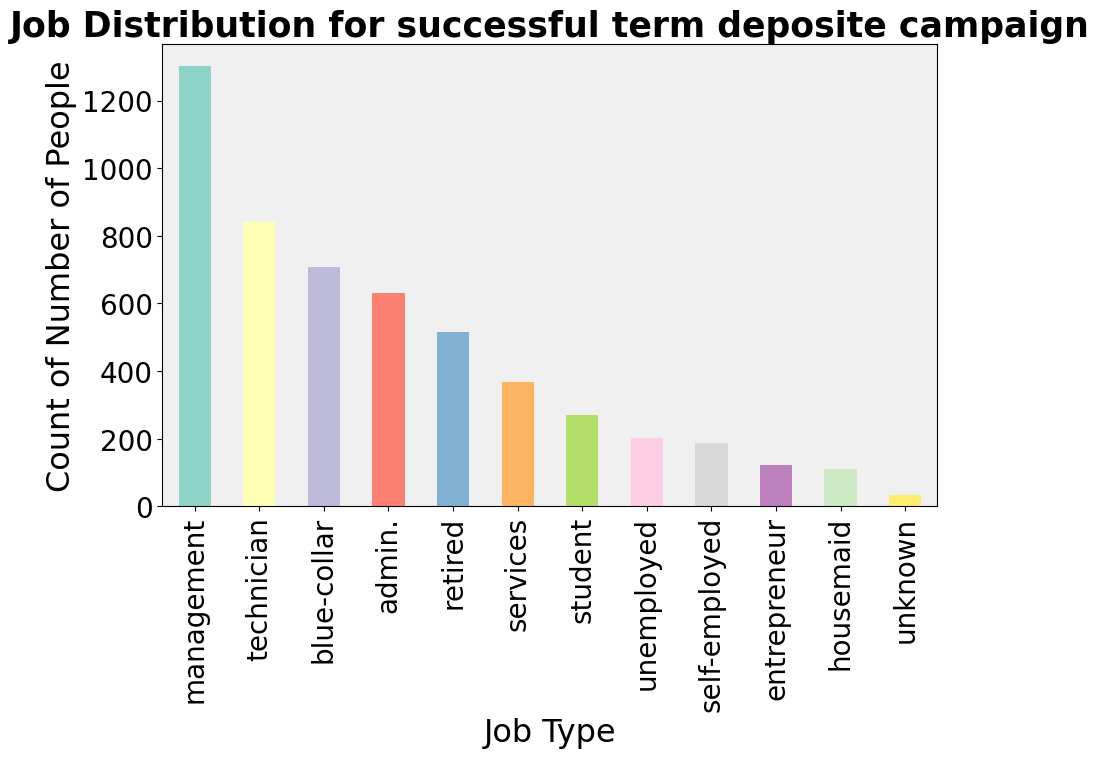

In [113]:

plot_barplot(data[data['y']=='yes'] , 'job' , 'Job Distribution for successful term deposite campaign' , 'Job Type' , 'Count of Number of People' )

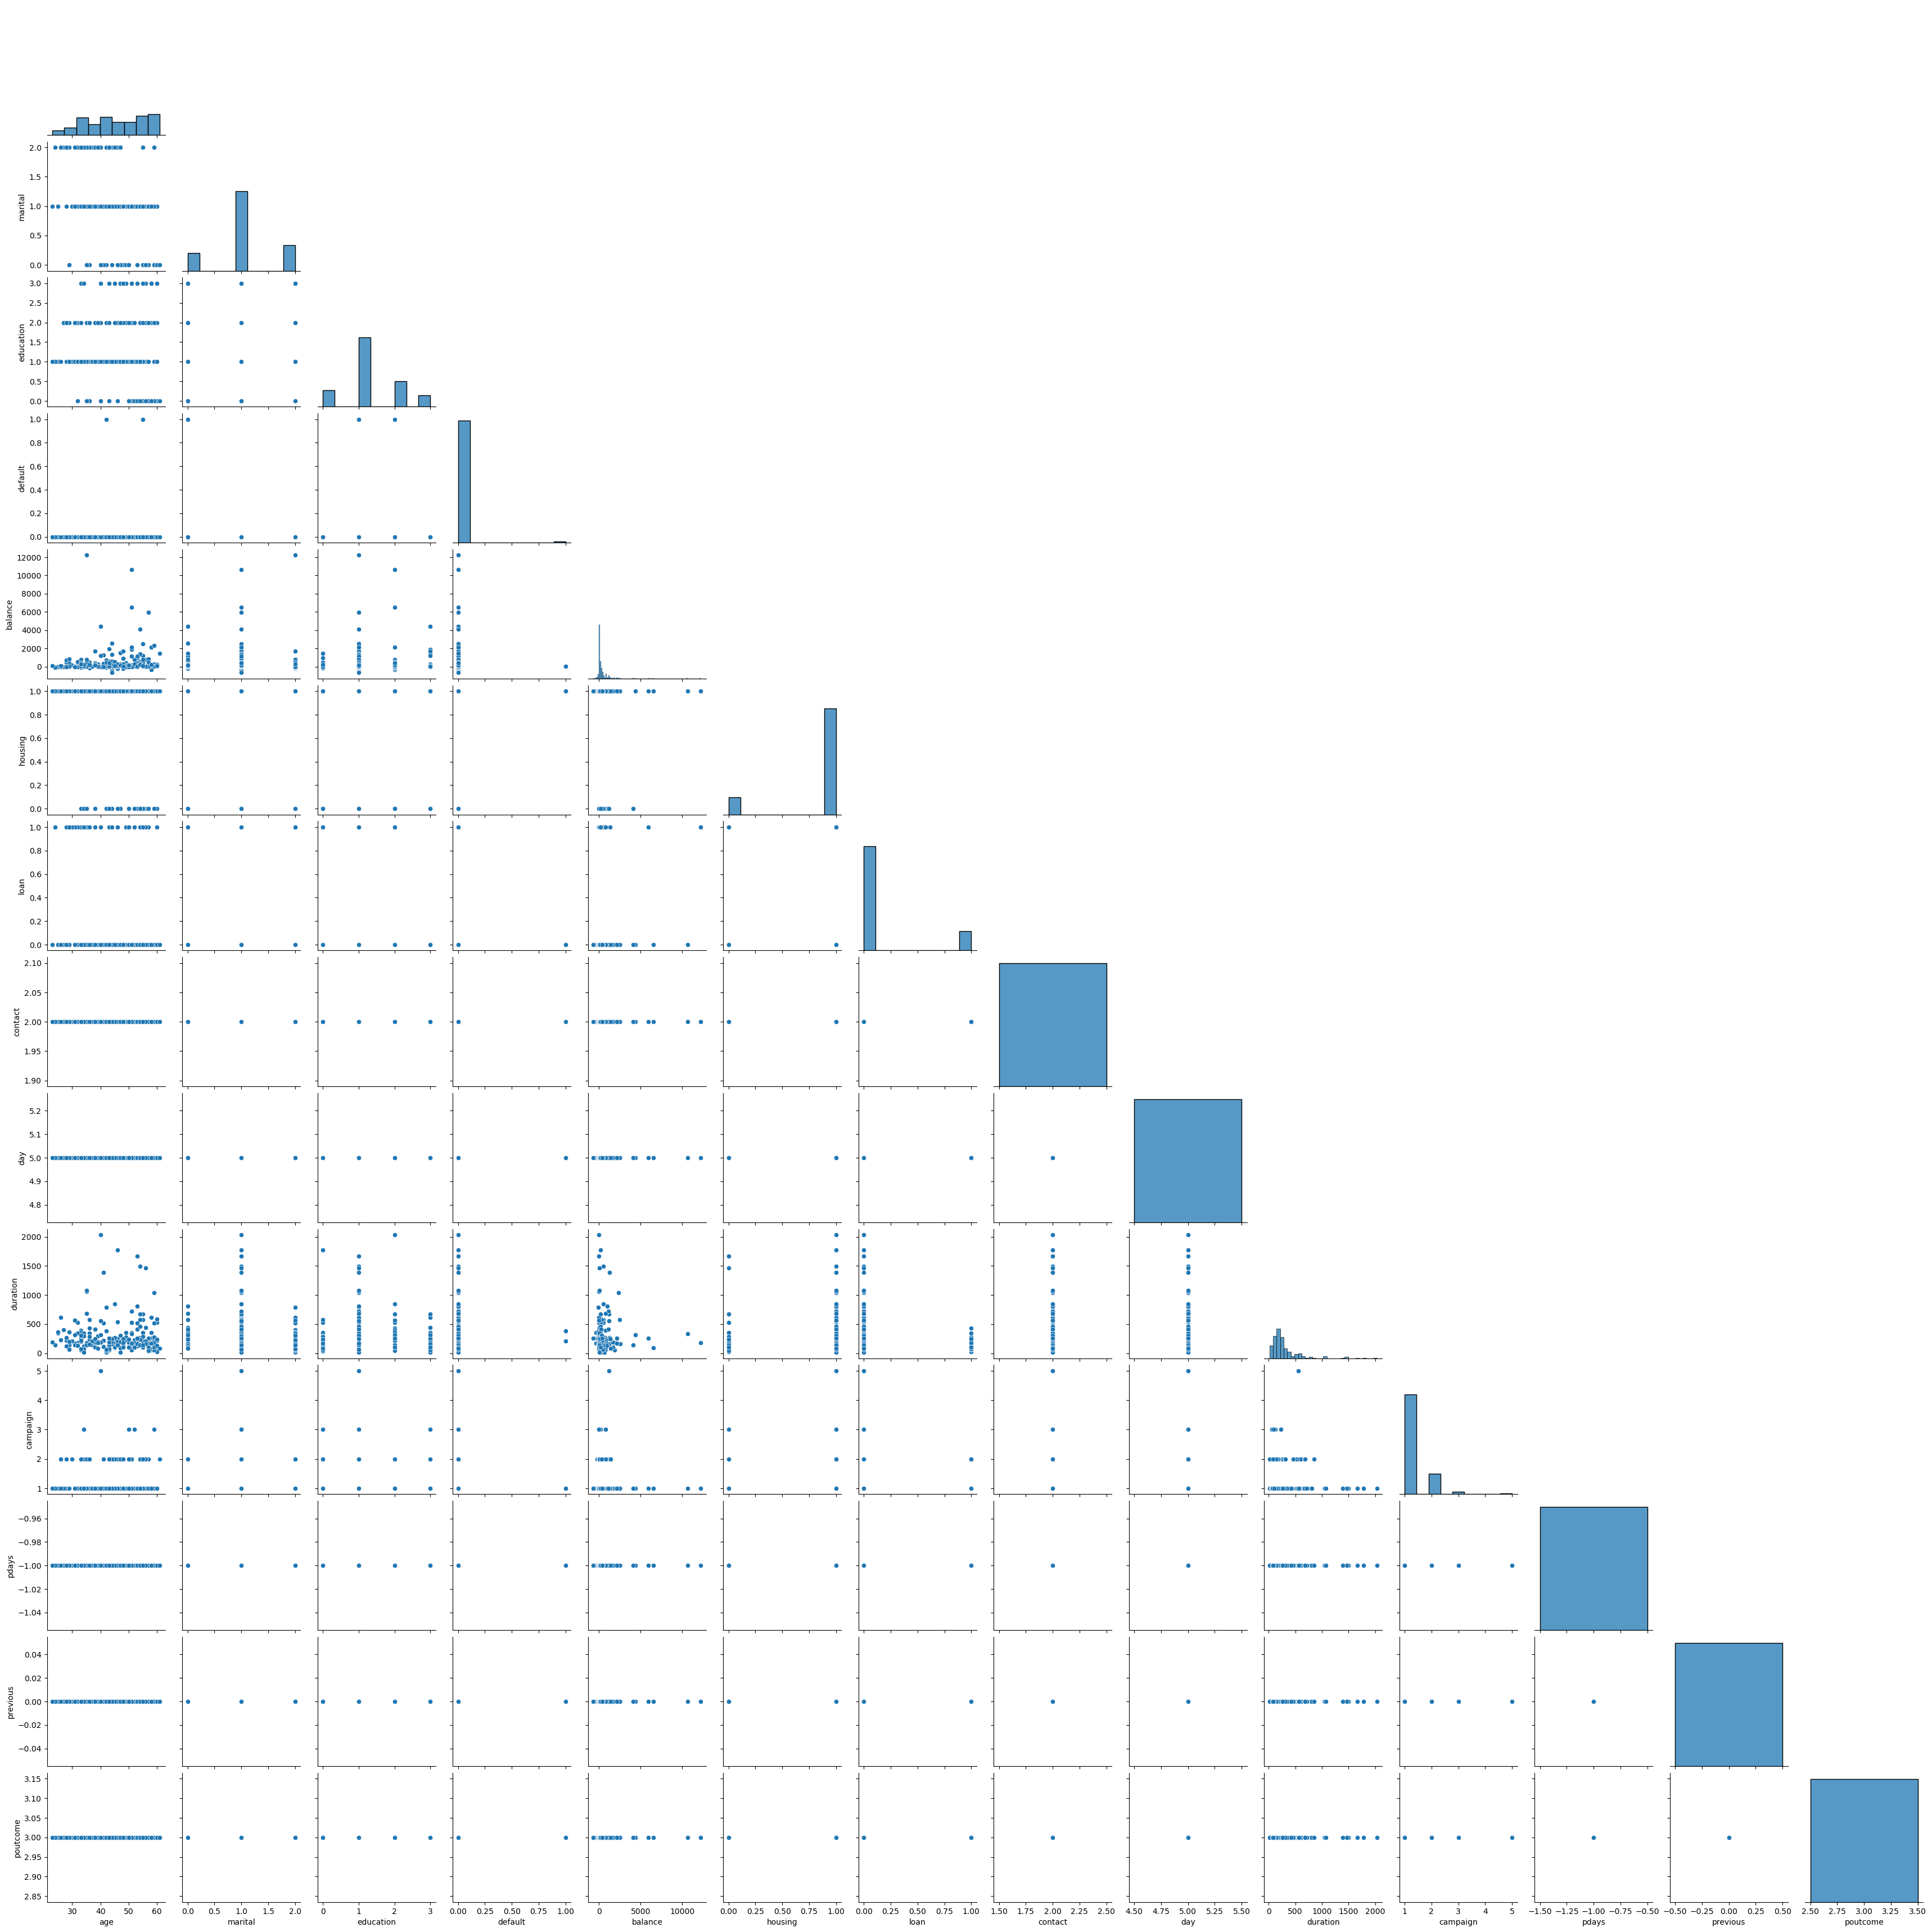

In [114]:

sns.pairplot(data[:200],corner=True)
plt.show()

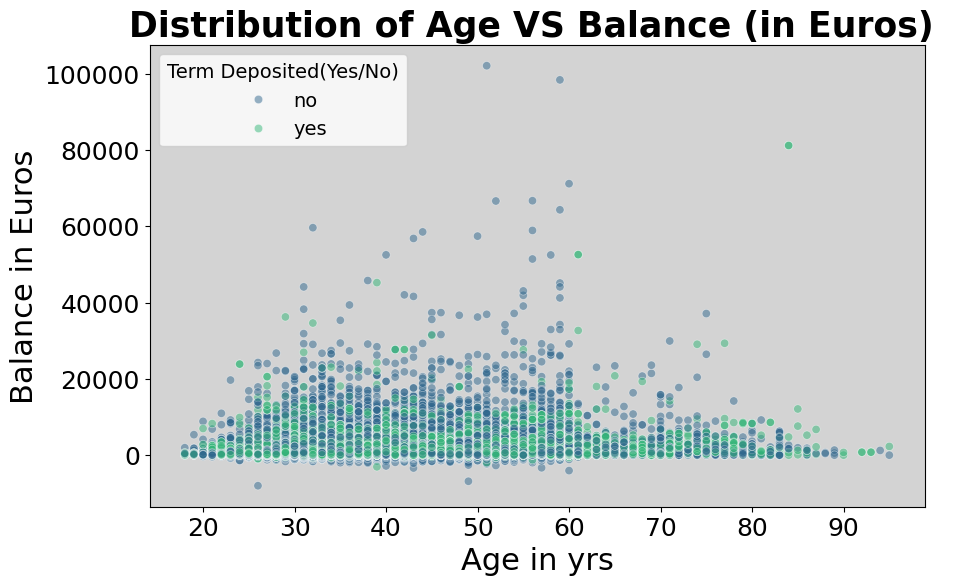

In [121]:
plot_scatterplot('age' , 'balance' , 'Age in yrs' , 'Balance in Euros' , 'y' , 'viridis' , 0.5 , 'Term Deposited(Yes/No)' , 'upper left' , 'Distribution of Age VS Balance (in Euros) ' , fontsize = 14)

In [116]:
data.dtypes

age           int64
job          object
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
y            object
dtype: object

In [117]:

data_int = data[['age','balance','day','duration','campaign','pdays','previous','marital','education','default','housing','loan','contact','poutcome']]
data_int


,age,balance,day,duration,campaign,pdays,previous,marital,education,default,housing,loan,contact,poutcome
0,58,2143,5,261,1,-1,0,1,2,0,1,0,2,3
1,44,29,5,151,1,-1,0,2,1,0,1,0,2,3
2,33,2,5,76,1,-1,0,1,1,0,1,1,2,3
3,47,1506,5,92,1,-1,0,1,3,0,1,0,2,3
4,33,1,5,198,1,-1,0,2,3,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,2,0,0,0,0,3
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,0,3
45208,72,5715,17,1127,5,184,3,1,1,0,0,0,0,2
45209,57,668,17,508,4,-1,0,1,1,0,0,0,1,3


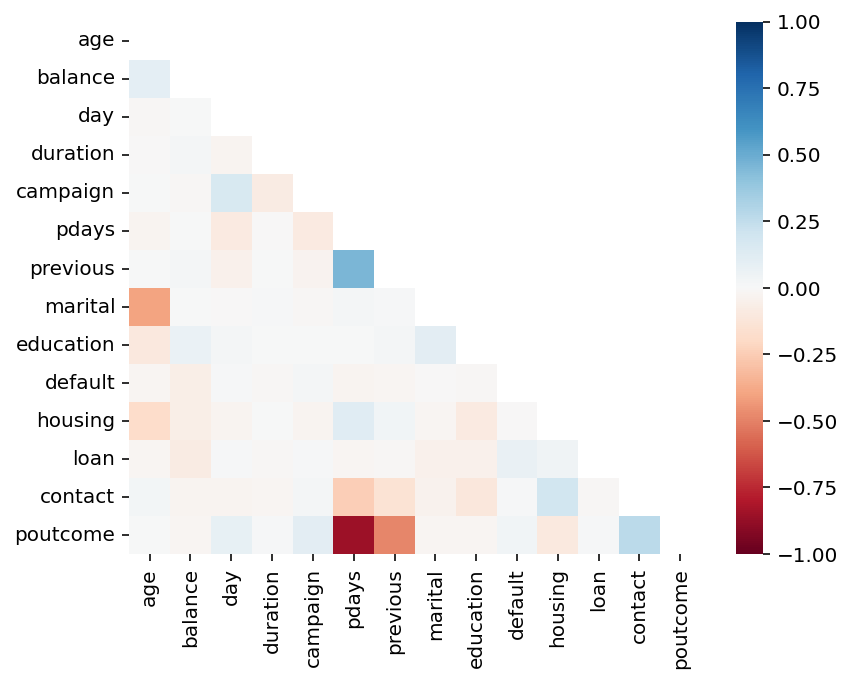

In [123]:
fig, ax = plt.subplots(dpi=144)
mask = np.triu(np.ones_like(data_int.corr()))
sns.heatmap(data_int.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', mask=mask)
plt.show()

In [118]:
def one_silhoutte(n, xy):
    """ 
    Calculates the silhoutte score for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)

    return score

In [ ]:
plt.plot(data['duration'],data['previous'],'bo',color='lightblue')

2 clusters silhouette score = 0.85
3 clusters silhouette score = 0.79
4 clusters silhouette score = 0.76
5 clusters silhouette score = 0.72
6 clusters silhouette score = 0.68
7 clusters silhouette score = 0.66
8 clusters silhouette score = 0.65
9 clusters silhouette score = 0.61
10 clusters silhouette score = 0.61

Best number of clusters = 2, Silhouette Score = 0.85


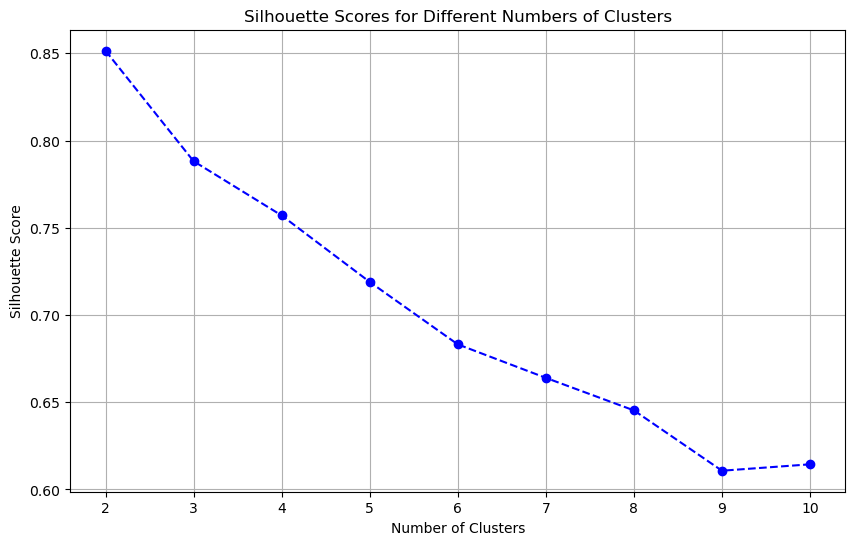

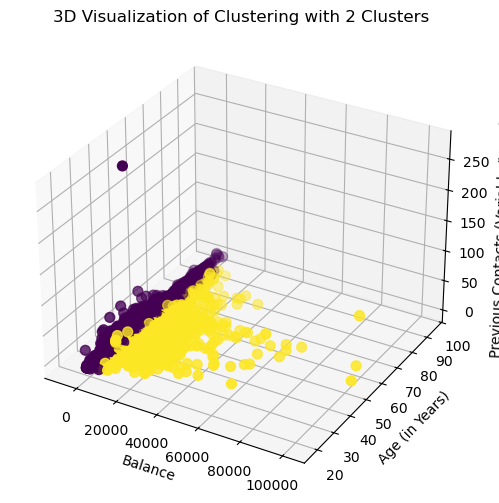

In [120]:

from mpl_toolkits.mplot3d import Axes3D

# Selecting 3 columns for 3D clustering: balance, age, and previous (or another feature)
xy = data[['balance', 'age', 'previous']].values if hasattr(data, 'values') else data

# Function to calculate silhouette score for a given number of clusters
def one_silhouette(n, xy):
    """ 
    Calculates the silhouette score for n clusters.
    """
    kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)  # Random state for reproducibility
    kmeans.fit(xy)
    
    labels = kmeans.labels_
    score = silhouette_score(xy, labels)
    return score

# Finding the optimal number of clusters
best_n, best_score = None, -np.inf
scores = []
for n in range(2, 11):  # Testing clusters from 2 to 10
    score = one_silhouette(n, xy)
    scores.append(score)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n} clusters silhouette score = {score:.2f}")

print(f"\nBest number of clusters = {best_n}, Silhouette Score = {best_score:.2f}")

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Visualizing clustering for the best number of clusters (3D plot)
kmeans = KMeans(n_clusters=best_n, n_init=29, random_state=1)
kmeans.fit(xy)
labels = kmeans.labels_

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], c=labels, cmap='viridis', s=50)
ax.set_xlabel('Balance')
ax.set_ylabel('Age (in Years)')
ax.set_zlabel('Previous Contacts (Variable "previous")')
ax.set_title(f"3D Visualization of Clustering with {best_n} Clusters")
plt.show()


In [ ]:
xy = data[['balance','age']].values if hasattr(data, 'values') else data

# Function to calculate silhouette score for a given number of clusters
def one_silhouette(n, xy):
    """ 
    Calculates the silhouette score for n clusters.
    """
    kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)  # Random state for reproducibility
    kmeans.fit(xy)
    labels = kmeans.labels_
    score = silhouette_score(xy, labels)
    return score

# Finding the optimal number of clusters
best_n, best_score = None, -np.inf
scores = []
for n in range(2, 11):  # Testing clusters from 2 to 10
    score = one_silhouette(n, xy)
    scores.append(score)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n} clusters silhouette score = {score:.2f}")

print(f"\nBest number of clusters = {best_n}, Silhouette Score = {best_score:.2f}")

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o', linestyle='--', color='b')

plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Visualizing clustering for the best number of clusters
kmeans = KMeans(n_clusters=best_n, n_init=29, random_state=1)
kmeans.fit(xy)
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(xy[:, 0], xy[:, 1], c=labels, cmap='viridis', s=50)
plt.ylabel('Age(in Years)')
plt.xlabel('Number of contacts performed before the campaign(Variable previous)')
plt.title(f"Visualization of Clustering with {best_n} Clusters")
plt.show()

2 clusters silhouette score = 0.85
3 clusters silhouette score = 0.79
4 clusters silhouette score = 0.76
5 clusters silhouette score = 0.72
6 clusters silhouette score = 0.68
7 clusters silhouette score = 0.66
8 clusters silhouette score = 0.65


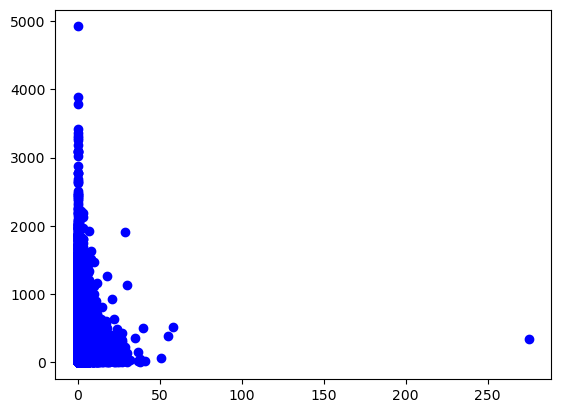